In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [29]:
data_train=pd.read_csv("/Users/shubhamgangwar/Documents/Python/AI:ML/Drug AI:ML/GXLE/trainingset-gxl.csv")

x_train=data_train[["GBSA-Evdw","GBSA-Eele","GBSA-GGB","GBSA-GSA","HB","RT","VDW","HP","HM","HS","charge","C","N","O","F","P","S","Cl","Br","I","heavy atoms","H"]]

y_train=data_train["deltaGexp"]

data_test=pd.read_csv("/Users/shubhamgangwar/Documents/Python/AI:ML/Drug AI:ML/GXLE/testset-gxl.csv")
x_test=data_test[["GBSA-Evdw","GBSA-Eele","GBSA-GGB","GBSA-GSA","HB","RT","VDW","HP","HM","HS","charge","C","N","O","F","P","S","Cl","Br","I","heavy atoms","H"]]

y_test = data_test["deltaGexp"]

transfer=StandardScaler()
x_train=transfer.fit_transform(x_train)
x_test=transfer.transform(x_test)

In [30]:
## Function to calculate the Pearson's Coefficient
def calculate_Rp(G_exp, G_pred):
    # G_exp is the experimental value and G_pred is the predicted value by the model
    G_exp = np.array(G_exp)
    G_pred = np.array(G_pred)

    # Mean of the values 
    G_pred_avg = np.mean(G_pred)
    G_exp_avg = np.mean(G_exp)

    # Numerator
    numerator = np.sum((G_pred - G_pred_avg) * (G_exp - G_exp_avg))

    # Denominator
    denominator = np.sqrt(np.sum((G_pred - G_pred_avg) ** 2) * np.sum((G_exp - G_exp_avg) ** 2))

    # Rp calculation
    Rp = numerator / denominator if denominator != 0 else np.nan

    print(f"Rp (Pearson correlation coefficient): {Rp:.4f}")

In [31]:
## Training the model

from sklearn.ensemble import ExtraTreesRegressor

et = ExtraTreesRegressor(n_estimators=50)
et.fit(x_train, y_train)

ExtraTreesRegressor(n_estimators=50)

In [32]:
y_pred = et.predict(x_test)
data_test["deltaGpred"]=y_pred

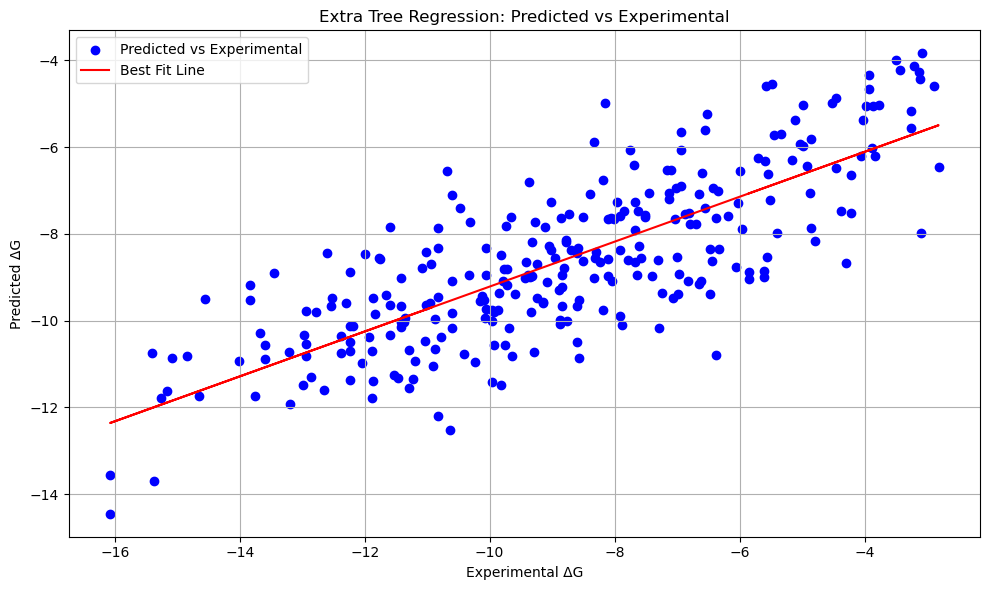

In [35]:
y_test = y_test.values if hasattr(y_test, "values") else y_test
y_pred = np.array(y_pred)

# Fit a best fit line (linear regression) between experimental and predicted
reg = LinearRegression().fit(y_test.reshape(-1, 1), y_pred)
line_y = reg.predict(y_test.reshape(-1, 1))

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Experimental')
plt.plot(y_test, line_y, color='red', label='Best Fit Line')

plt.xlabel('Experimental ΔG')
plt.ylabel('Predicted ΔG')
plt.title('Extra Tree Regression: Predicted vs Experimental')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
calculate_Rp(data_test["deltaGexp"],data_test["deltaGpred"])
print(f"MSE: ",mean_squared_error(y_test, y_pred))
print(f"RMSE:  {root_mean_squared_error(y_test, y_pred)}")

Rp (Pearson correlation coefficient): 0.7906
MSE:  3.4754264755002393
RMSE:  1.8642495743596776
